---
title: "Chapter 2, Part 1 : The Classification Problem. EDA and Preprocessing"
subtitle: "Machine Learning"
date: "January 2025"
date-format: "MMMM YYYY"
author: 
  - F.San Segundo & N.Rodríguez \inst{1}
institute: 
  - \inst{1} Based on notes by Professors A.Muñoz, J.Portela & J.Pizarroso
bibliography: "../MLMIC.bib"
execute:
  echo: true
code-overflow: wrap
format: 
  html: 
    toc: true
    code-fold: show
    code-summary: "Hide the code"
    code-tools: true
    embed-resources: true
---

# The classification problem



::: {.callout-note icon=false}

## Example: Heart Disease Prediction

![](./fig/02-01_heartDisease.png){width=60% fig-align="center" fig-alt="Classification problem example: heart disease"}

::: 

[Source: CDC Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

+ The classification problem begins with a question, where **the expected answer belongs to a finite set of classes**. In the heart disease example above the answer to the question "Are you at risk?" is expected to be "Yes" or "No". Note that a different kind of answer (e.g. a numeric risk score) defines a different kind of problem (regression).

---

::: {.callout-note icon=false}

# Definition of the problem


In statistics, classification is the problem of identifying which of a set of categories (sub-populations) an observation (or observations) belongs to.

+  **Binary classification:** observations are grouped in *two categories*.  
   ![](./fig/02-01_BinaryClassification.png){width=25% fig-align="center" fig-alt="Binary Classification"}
   
+  **Multiclass problem:** the number of possible categories exceeds two.  
   ![](./fig/02-02_MulticlassClassification.png){width=25% fig-align="center" fig-alt="Multiclass Classification"}

:::


Examples are assigning a given email to the ["spam" or "non-spam" class](https://en.wikipedia.org/wiki/Spam_filtering), and assigning a diagnosis to a given patient based on observed characteristics of the patient (sex, blood pressure, presence or absence of certain symptoms, etc.).

---

::: {.callout-note icon=false}

## A Five Steps Draft Plan to Solve the Classification Problem 

1) **Collect data**
2) **Preprocess / Explore Data (EDA)**
3) Choose a model
4) Fit the parameters of the model
5) Assess the model quality

:::

+ In this session we will see a very simple first example of executing this plan, to get a first impression without getting tangled in the details. But our focus, as indicated, will be in the first two steps pf the process. Then, in later sessions we will look into those details as we learn more about Machine Learning (ML) models and the whole ML process. 

+ As we gain experience we will see that this plan is in fact a draft, and we will begin to analyze more elaborate strategies in ML.  

---

# Step1: collect data.

::: {.callout-note icon=false}

#### $\,$

+ **Data is the fuel of ML.** We need to gather as much data as possible with labeled cases (the outputs)
+ Decide which variables should be measured. **Expert knowledge** is fundamental to identify potentially relevant variables. Missing a key relevant variable can throw away the entire project.
+ **Feature Selection** is the process of selecting a subset of relevant features (inputs, variables, predictors) for use in model construction.
+ It is very important to gather **data for all output categories!**

:::

![](./fig/02-02_heartDisease_featureSelection.png){width=100% fig-align="center" fig-alt="Heart Disease Feature Selection"}

--- 


::: {.callout-note icon=false}

#### $\quad$

+ Learn about **Raw vs Processed** data. See [Jeff Leek's website](http://jtleek.com/modules/03_GettingData/01_02_rawAndProcessedData/#6) or [Wikipedia](https://en.wikipedia.org/wiki/Raw_data).
+ **Garbage in, garbage out (GIGO) principle:** The output of our ML algorithm will be as good (or as bad) as the quality of the input data it receives.
+ Getting good data takes a lot of time and resources. [Forbes 2019: Data is the New Oil](https://www.forbes.com/sites/forbestechcouncil/2019/11/15/data-is-the-new-oil-and-thats-a-good-thing/)

:::

![](./fig/02-08_dataNewOil.png){width=60% fig-align="center" fig-alt="Wired. Data is the New Oil" width=30%}  
  
[Source: Wired Journal (2014)](https://www.wired.com/insights/2014/07/data-new-oil-digital-economy/)

---

::: {.callout-note icon=false}

### Data Structures for Machine Learning: 

Datasets for Machine Learning classification problems are usually prepared in the shape of a data table containing:

+ A set of n *attributes (features or variables)* corresponding to the *columns* of the table.
+ A set of N labeled *samples (observations, data points)* (elements for which you want to make predictions), Each sample corresponds to a *row* of the table.

:::

A data table for the heart disease problem could be something like:

![](./fig/02-03_heartDisease_dataTable.png){width=75% fig-align="center" fig-alt="data table example fpr heart disease classification" width=90%}


---

# Probabilitic (Soft) Approach to Classification

+ We now deal with binary classification and will return to the multiclass problem later. For binary classification many of the models we will study use a **soft partition** or **probabilistic** approach. 

+ Let $\Omega$ be our inputs space, so that each data point (sample) $(\mathbf x, y)$ is given by a point $\mathbf x$ in $\Omega$ and an output value $y\in\{0, 1\}$.   
**Note:** In each particular problem the output $y$ can only take two different values: (yes, no), (true, false), (dog, cat) and so on. But sometimes it is useful to identify these values with (1, 0). 

::: {.callout-note icon=false}

## Binary Classification Model, Probabilistic Approach

+ In this probabilistic approach a (binary) classification model is a function (rule, algorithm)  
  $$f(\mathbf x) = P(y = 1 | \mathbf x)$$
  that returns the *conditional probability* that the output $y$ equals 1, given an input value $\mathbf x \in \Omega$. 

:::

---

::: {.callout-note icon=false}

### Class vs Probability Prediction 

+ You can think of the function $f$ as an answer to the question:  
  given that we know that the input is $\mathbf x$, *how certain are we* that the output value $y$ is 1; that is, it belongs to the first class? 

:::

+ The answer comes in the form of a probability. In the plot below we have two continuous input variables $x_1, x_2$. The *true class* of the binary output $y$ is indicated by the color  of the sample points (blue corresponds to class yes, red to class no). The function $f$ defines *levels of certainty* of the value of $y$, represented in this plot by level curves of $f$.

![](./fig/02-06_softPartition.png){width=80% fig-align="center" fig-alt="Soft Partition"}


---

::: {.callout-note icon=false}

### From probablity (soft) prediction to class (hard) prediction.

+ Once we have a probability prediction model $f$ we can **set a threshold** to obtain class predictions. For example if we choose a threshold at $70%$ certainty (i.e. 0.7 in terms of probability) then we assign classes using this rule:
$$
\text{class}(y|\mathbf x) = 
\begin{cases}
1 & \text{ if }f(\mathbf x) = P(y = 1 | \mathbf x) \geq 0.7\\[3mm]
0 & \text{ if }f(\mathbf x) = P(y = 1 | \mathbf x) < 0.7
\end{cases}
$$
:::

+ In the previous example, the plot of the class assignment now provides a **hard boundary**, a single curve between classes:  
![](./fig/02-07_hardPartition.png){width=80% fig-align="center" fig-alt="Hard Partition"}  
  The legend of the plot points at the associated **misclassification problem.** Some points with true class equal `no` get a prediction of class `yes` (false positives). We wiill return to this shortly, when discussing how to assess the quality of a classification model. 


---

::: {.callout-note icon=false}

### Probablity prediction vs scores.

+ As we will see, the output of many Machine Learning models for classification problems is not a probability but a **score**. That is, a numerical value (usually in the $[0, 1]$ interval). The score is somehow connected to the degree of certainty that the model has in its predictions. If the score corresponds (as usual) to the positive class (usually represented as 1 or YES or True) then a higher score means that the model is more certain when predicting positive. The scores should therefore be ordered.  

:::

::: {.callout-note icon=false}

###  Calibration.

+ But to be interpreted as probabilities the scores should be **calibrated**. A perfectly calibrated scoring means that if we take 100 predictions of the model, all of them with score 0.7, then seventy of them shoul be real positives and 30 should be real negatives. Of course real models are often not perfectly calibrated. We will return to this issue of calibration later.

:::

---


# 1. Collect and Input Data

::: {.callout-note icon=false}

## Tabular Data

* Our data sources in this course will follow a tabular structure in which (tidy data):
    * each **column** of the table contains values of a **variable** in the dataset.
    * each **row** of the table contains an **observation** (case, individual).

* Quite often data is not organized in a tabular way. Sometimes, it can be rearranged into that shape. This **data wrangling** operations (reshaping data, merges, etc.) are time consuming and require experience and skill. Besides there are many sources of data that do not fit into this tabular data structures. 

:::

::: {.callout-note icon=false}

## Tabular Data in Plain Text Files or Spreadsheets

+ The data in this course will usually be stored in plain text files (with extensions like txt, csv, dat) or in spreadsheet formats. We recommend uing a good **text editor** for text files and limiting the use of **spreadsheets** only for that specific case. 

+ Pay attention to the structure of text files. Look for a **header line** with names fOR the variables in the table.  Each data row in the file corresponds to an observation (row). The values (columns) in the line are separated with a **separator character** (comma, space, tab, etc.)

:::

---

# 2 Preprocessing and EDA: basic steps

The second step in our plan to solve the classification problem is itself a multistep process:

::: {.callout-note icon=false}

### Basic Steps in Preprocessing

* Step 1 : Import the dataset and do a preliminary exploration
* Step 2 : Choose proper type, names and encoding for the variables
* Step 3 : Check out the missing values and possible errors
* Step 4 : Split the dataset into Training, Validation and Test Sets
* Step 5 : Plot the numeric variables in training data and check out for outliers
* Step 6 : EDA and feature selection or engineering. Pipelines.
* Step 7 : Check out for class imbalances.

:::

We will next see a first basic example of how to perform these steps using Python.

---

# Python Example 

+ To start practicing with Python we will use the data file in this session's folder called `Simdata0.csv`. This file contains a synthetic dataset with several input variables and one categorical output variable `Y`.  

::: {.callout-important}

Always begin opening every new data file in a **text editor**. Look for the presence of a *header* line, the *separator* used and any other relevant characteristic of the data file. 

:::  
 
 * Do it now for this example file. 

 ---
  


# 2 Preprocessing, Step 1 : Import the dataset and do a preliminary exploration  {.unnumbered .unlisted}

We will usually begin importing some of the **standard Python Data Science libraries**, as in 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


Then load the data and see the first lines of the table: run the code below (it may need some modification).

In [4]:
df = pd.read_csv('Simdata0.csv')
df.head(4)

,id,X1,X2,X3,X4,Y
0,0,-1.055092,2.079289,2.869735,B,1
1,1,-0.219354,3.260428,2.025598,B,1
2,2,2.718957,1.709043,-1.027776,A,1
3,3,0.143881,4.281243,1.331685,B,0


::: {.callout-tip  icon=false}
### Exercise 000.
This command as it stands will not work. Read the error message, also read the [`pd.read_csv` documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and fix the error.
:::

---

::: {.callout-note  icon=false}

### Data cleaning

This is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting them.

A good starting point is gathering basic information such as the dimensions of the table, names and types of variables and possible missing values. This is provided by the `ìnfo` method in Pandas.

:::

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1000 non-null   int64  
 1   X1      997 non-null    float64
 2   X2      998 non-null    float64
 3   X3      1000 non-null   float64
 4   X4      1000 non-null   object 
 5   Y       1000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB


There seems to be missing values in `X1` and `X2`. 

---

We should always check the first few rows of the table to get a first impression of the data. Use the pandas method `head` for this:

In [6]:
df.head()

,id,X1,X2,X3,X4,Y
0,0,-1.055092,2.079289,2.869735,B,1
1,1,-0.219354,3.260428,2.025598,B,1
2,2,2.718957,1.709043,-1.027776,A,1
3,3,0.143881,4.281243,1.331685,B,0
4,4,-0.191721,2.405672,2.214553,B,1


::: {.callout-warning icon=false}

+ Let Jupyter care  about the table printing format. Do not use `print` for pandas DataFrames in notebooks!
+ Always be mindful of the size and relevance of the output of your notebook cells!
:::

----

::: {.callout-note icon=false}

### Remove Unused Columns from the Dataset

Often the dataset will contain some **index variables**, that only serve the purpose of identifying particular data points. The simplest example would be a column that contains the row numbers for the dataset. This kind of variable should be removed before proceeding with the analysis. In our dataset this is the cse for the first column `id`.

:::

In [7]:
df.drop(columns="id", inplace=True) 

Always check the result:

In [8]:
df.head()

,X1,X2,X3,X4,Y
0,-1.055092,2.079289,2.869735,B,1
1,-0.219354,3.260428,2.025598,B,1
2,2.718957,1.709043,-1.027776,A,1
3,0.143881,4.281243,1.331685,B,0
4,-0.191721,2.405672,2.214553,B,1


::: {.callout-warning icon=false}

Reducing the number of variables is very important if we are to avoid [one big danger!](./TheCurse.html) You can read more (serious stuff) about this here.

:::

----

# 2 Preproc; Step 2 : Choose proper type, names and encoding for the variables  {.unnumbered .unlisted}

::: {.callout-note icon=false}

### Think about the proper type for each variable

Make sure that the Python type of each variable in the dataset matches its meaning and our modeling choices. Use `nunique` to see the number of differeent values for each variable (e.g. to decide if we consider a numeric variable as discrete or continuous).

:::

In [9]:
df.nunique()

X1     997
X2     995
X3    1000
X4       2
Y        2
dtype: int64

----

::: {.callout-note icon=false}

### Identify the output variable and the categorical inputs and set their type

In particular, set the type of all categorical variables (aka factors or qualitative variables) to `category` as follows (and check the result!). Remeber that in classification problems the output is always categorical.

We will also be using fixed names, such as `cat_inputs` below, to make the code reusable in the following sessions: 

:::

In [10]:
output = 'Y'
cat_inputs = ['X4']
df[cat_inputs + [output]] = df[cat_inputs + [output]].astype("category")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      997 non-null    float64 
 1   X2      998 non-null    float64 
 2   X3      1000 non-null   float64 
 3   X4      1000 non-null   category
 4   Y       1000 non-null   category
dtypes: category(2), float64(3)
memory usage: 25.8 KB


----

::: {.callout-note icon=false}

### Numerical inputs

Similarly we identify the set of numerical inputs and create an index of all input variables.

:::

In [11]:
inputs = df.columns.drop(output)
num_inputs = inputs.difference(cat_inputs).tolist()
print(inputs)


Index(['X1', 'X2', 'X3', 'X4'], dtype='object')


::: {.callout-warning icon=false}

### Notes about Setting the Variable Types.

+ Setting the type as category is important for EDA, it will make Python visualization libraries work as intended. But below we will consider a different encoding of factors (one hot), to meet the requirements of `scikit-learn`.
+ Do not automatically assume that variables read by Pandas as `object` are categorical. This is a common source of modeling mistakes.
+ When missing values exist you may need to deal with them before properly setting the variable types. 

:::



----

::: {.callout-note icon=false}

### One Hot Encoding of the Categorical Inputs

The `scikit-learn` library requires numerical inputs. Therefore, we will encode the categorical inputs in a numeric format, called **One Hot Encoding**, illustrated in the figure below.

![](./fig/2_1_001_OneHotEncoding.png){width=100% fig-align="center" fig-alt="One Hot Encoding of Factors"}

As you can see, a categorical input with $k$ levels is encoded in a set of $k$ new variables (columns), all of which equal 0 except for the one that corresponds to the level of the current observation. 

:::


----

::: {.callout-note icon=false}

### One Hot Encoding (OHE) in scikit-learn

The code that we use below performs this one hot encoding and adds the resulting new columns to the DataFrame. But it also keeps the columns with previous versions of the categorical inputs, because we will use them in EDA below. Besides,  

:::

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe_result = ohe.fit_transform(df[cat_inputs])

ohe_inputs = [ohe.categories_[k].tolist() for k in range(len(cat_inputs))]
ohe_inputs = [cat_inputs[k] + "_" + str(a) for k in range(len(cat_inputs)) for a in ohe_inputs[k]]

ohe_df = pd.DataFrame(ohe_result, columns=ohe_inputs)
df[ohe_inputs] = ohe_df

Note that the lists `num_inputs` and `cat_inputs` and the `output` are unaffected by this.

::: {.callout-tip  icon=false}
### Exercise 001.

Split the above code cell at the blank lines and use this to check the steps of the `ohe` process displaying `ohe_result`, `ohe_inputs` and `ohe_df`. Also display the resulting `df` and check it e.g. with `df.info()`. 

:::


----

# 2 Preprocessing, Step 3: Check out the missing values  {.unnumbered .unlisted}

We can do a quick check of the number of missing values per column, to confirm what we saw before:

In [13]:
df.isnull().sum(axis=0)

X1      3
X2      2
X3      0
X4      0
Y       0
X4_A    0
X4_B    0
dtype: int64

Dealing with missing values is usually non trivial. After identiying them we can either drop them or try to replace them with some meaningful values (imputation). We will discuss that later in the course. For now we just drop the table rows containing missing values. Note the `inplace` argument and check the result again with the preceding command after removing the missing data with this command:

In [14]:
df.dropna(inplace=True)
df.isnull().sum(axis=0)

X1      0
X2      0
X3      0
X4      0
Y       0
X4_A    0
X4_B    0
dtype: int64

---

# 2 Preprocessing, Step 4: Split the dataset into Training and Test Sets  {.unnumbered .unlisted}

This step is a crucial part of the method that we use to assess model performance. We will have plenty of oportunities to go into details in the course, but the central idea is that we need to keep a part of the data (test set) hidden from the model, so that we can use it at the end to get a better mesaure of the model's p erformance. We must do this in the early steps of preprocessing for this strategy to work. 

::: {.callout-note icon=false}

### Using Standard Names for the Variables

+ The classification problem for this dataset is trying to predict the value of `Y` (output variable) from the values of `X1, X2, X3, X4` (the inputs). 

+ In order to make our code useful for different datasets and problems we will try to use the same variable names in the modeling code. In particular we use the following code to distinguish the output and input variables in Python:

:::

In [15]:
X = df.drop(columns=output)
Y = df[output]

----

The actual splitting is now accomplished with:

In [17]:
from sklearn.model_selection import train_test_split
XTR, XTS, YTR, YTS = train_test_split(X, Y,
                                      test_size=0.2,  # percentage preserved as test data
                                      random_state=1, # seed for replication
                                      stratify = Y)   # Preserves distribution of y

The `stratify = y` option guarantees that the proportion of both output classes is (approx.) the same in the trainng and test datasets. 


::: {.callout-tip  icon=false}
### Exercise 002.
Check this statement by making a frequency table for the output classes in training and test. 

:::

---

# 2 Preproc; Step 5: Plot the numeric variables in training data and check out for outliers  {.unnumbered .unlisted}


**Outliers** (also called *atypical values*) can be generally defined as *samples that are exceptionally far from the mainstream of the data*. Formally, a value $x$ of a numeric variable $X$ is considered an outlier if it is bigger than the *upper outlier limit*
$$q_{0.75}(X) + 1.5\operatorname{IQR}(X)$$ 
or if it is smaller than the *lower outlier limit* 
$$q_{0.25}(X) - 1.5\operatorname{IQR}(X),$$ 
where $q_{0.25}(X), q_{0.45}(X)$  are respectively the first and third **quartiles** of $X$ and $\operatorname{IQR}(X)$ is the **interquartilic range** of $X$. 

![](./fig/outliers_Imagen%20de%20MachineLearning_Ch2_Classification_1_Intro_preprocess_v3_%20p19.png){width=40% fig-align="center" fig-alt="Outliers"}

A boxplot graph, like the one on the left, of the variable is often the easiest wy to spot the pressence of outliers.

___


::: {.callout-note icon="false}
### Types of outliers:

+ When one or more samples are suspected to be outliers, the first step is to make sure that the values are valid and that no **data recording errors** have occurred.

+ With small sample sizes, **apparent outliers** might be a result of a skewed distribution where there are not yet enough data to see the skewness.

+ Finally, there are **"True" informative outliers**.

:::

Just as we saw with missing data, dealing with outliers is not trivial (even when we are able to separate apparent from real outliers). Sometimes we will have to check their influence in the model before deciding how to proceed. 

In simple cases, where the outliers represent a very small fraction of the training data, we will simply remove them. But keep in mind that this is not always a good idea. In fact, the removal of *all* outliers often leads to the appearance of new outliers.

___

::: {.callout-note icon="false"}

#### Boxplots for the Numerical Inputs

The following code makes boxplots of all the numeric inputs in our example dataset:
:::

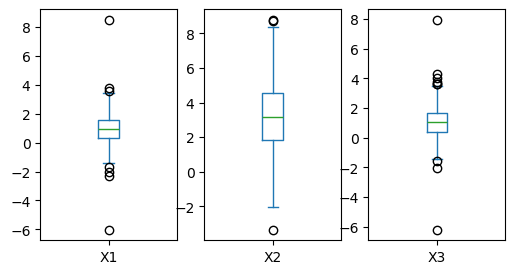

In [18]:
XTR_numeric_boxplots = XTR[num_inputs].plot.box(subplots=True, 
                                            layout=(1, len(num_inputs)), 
                                            sharex=False, sharey=False, figsize=(6, 3))

The plot reveals some clearly atypical values in `X1, X3`, while some other outliers closer to the boxes can be considered as simply belonging to the tails of the distributions for the variables. 

---


::: {.callout-note  icon=false}
### Dropping outliers.

We have used the basic boxplot provided by pandas. But in order to drop the outliers we need to locate them. The following function provides an alternative boxplot graph using the seaborn library. The function parameters are a Pandas Dataframe `df` and a list `num_vars` of names for numerical variables in `df`. The return value is a dictionary whose keys are the names in `num_vars`. The values are also dictionaries with (self-explanatory?) names `values`, `positions` and `indices`.   

:::


In [19]:
from matplotlib.cbook import boxplot_stats

def explore_outliers(df, num_vars):
    fig, axes = plt.subplots(nrows=len(num_vars), ncols=1, figsize=(7, 3), sharey=False, sharex=False)
    fig.tight_layout()
    outliers_df = dict()
    for k in range(len(num_vars)):
        var = num_vars[k]
        sns.boxplot(df, x=var , ax=axes[k])
        outliers_df[var] = boxplot_stats(df[var])[0]["fliers"]
        out_pos = np.where(df[var].isin(outliers_df[var]))[0].tolist() 
        out_idx = [df[var].index.tolist()[ k ] for k in out_pos]
        outliers_df[var] = {"values": outliers_df[var], 
                            "positions": out_pos, 
                            "indices": out_idx}
    return outliers_df

---

::: {.callout-tip  icon=false}
### Exercise 003.

Use this function with the numeric inputs in `XTR`. Then use the result to drop all the outliers. Make sure that you actually remove them from `XTR`. Also make sure to remove the corresponding output values in `YTR`.
:::


In [22]:
# %load "../exclude/code/2_1_Exercise_003.py"

___

# 2 Preproc; Step 6: EDA and Feature selection or engineering. Pipelines.  {.unnumbered .unlisted}

In this step we will look into the distribution of each of the input variables and at the same time we will study the possible relations between them. This includes relations between the input variables by themselves and also the relation of the inputs with the output $Y$. As a result of this **Exploratory Data Analysis (EDA)** we will decide if we need to apply a transformation or to create new input variables and, given the case, whether to select a smaller set of inputs. This last part belongs to the set of techniques called **Feature Selection and Engineering**.

::: {.callout-note icon="false}
### Tasks associated with EDA and Feature Selection

In this section we will discuss several topics related to this kind of analysis:

**EDA**

* The `describe` function.
* Pairplots.
* Relation between numerical inputs and factor inputs.

**Feature Selection and Engineering**

* Correlation between numerical inputs.
* Variable transformations and pipelines.

:::

We will also see that Scikit-learn provides a **pipeline** mechanism to ease the implementation of Feature Engineering and Modeling. 

---


::: {.callout-note icon="false}
### The `describe` function.

This pandas function provides numerical summaries for the variables in a dataframe. If applied directly the output only considers numerical variables. Thus, it is best to deal with numerical and factor inputs separately.

:::

For numeric inputs (we transpose the resulting table because we have a small number of variables) we get standard statistical summaries:


In [23]:
XTR[num_inputs].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,783.0,0.959919,0.926650,-1.395655,0.319030,0.961506,1.569518,3.401924
X2,783.0,3.157209,1.965182,-2.043726,1.857064,3.157723,4.550626,8.355793
X3,783.0,1.038966,0.958495,-1.349988,0.421874,1.049817,1.668060,3.490106


For input factors we obtain basic information (number of distinct values, the mode and its frequency):

In [19]:
XTR[cat_inputs].describe().transpose()

,count,unique,top,freq
X4,796,2,B,414


___

::: {.callout-note icon="false}

### Pairplots

A pairplot for a set of variables $V_1, \ldots, V_j$ is a set of plots arranged in a rectangular (or triangular) grid, describing the distribution and relations between those variables. Here we use [seaborn `pairplot` function](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to draw a pairplot for the numerical inputs.
:::




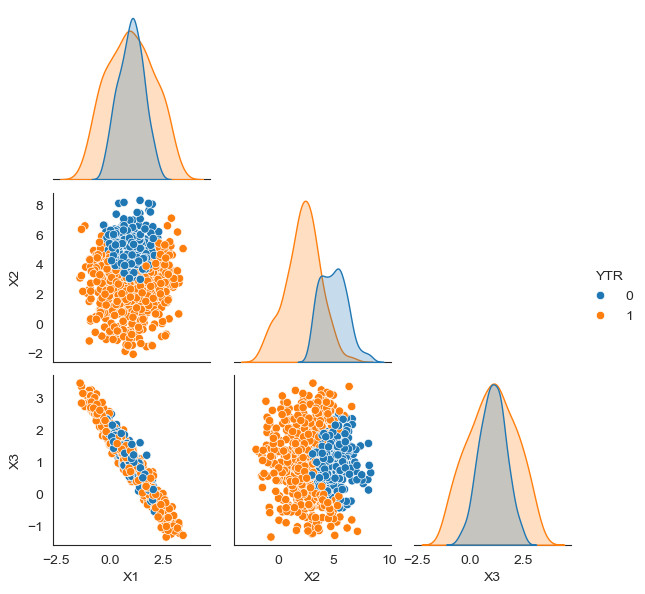

In [24]:
sns.set_style("white")
plt_df = XTR[num_inputs].copy()
plt_df["YTR"] = YTR
sns.pairplot(plt_df, hue="YTR", corner=True, height=2)

---

::: {.callout-warning icon="false}

### Notes about pairplot use and interpretation

+ The plot in a position outside the diagonal describes the relation between two variables. The type of plot depends on the nature of these variables; e.g. a scatterplot if both are numerical. 
+ The plots in the diagonal describe the distribution of the corresponding variable; e.g. with density curves for numerical variables.
+ The `corner` argument removes the (redundant) plots above the diagonal.
+ **In a classification problem we can use the `hue` argument to include the information about the outplut classes into the plots (different colors for each class).** 
+ **Be careful when using pairplots for datasets with a large number of variables!** The pairplot is more difficult to interpret and your computer's memory can be exhausted.

:::

In our example the pairplot shows these remarkable features of the dataset:

+ A clear and strong linear relation between $X_1$ and $X_3$. We will confirm this with the correlation matrix and use it in feature selection. 
+ A clearly visible patterm in the $X_1, X_2$ scatterplot, corresponding to the output $Y$ classes. But $X_1$ and $X_2$ seem uncorrelated. 
+ The $X_2, X_3$ is similar; not a surprise given the strong relation between $X_1$ and $X_3$.
+ The diagonal shows approximately normal distributions for $X_1, X_2,X_3$ and hints at $X_2$ as the best single predictor for $Y$.


___

::: {.callout-note icon="false}

### Plots to Study Numerical Input vs Factor Input Relations

The following code will plot parallel boxplots for each combination of a numerical input and a factor input. This information is useful for feature selection and engineering.
:::

In [ ]:
for numVar in num_inputs: 
    catvar_num = 0
    if len(cat_inputs) > 1:
        fig, axes = plt.subplots(1, len(cat_inputs))  # create figure and axes
        print(f"Analyzing the relation between factor inputs {cat_inputs[catvar_num]} and ", numVar)
        for col, ax in zip(cat_inputs, axes):  # boxplot for each factor inpput            
            catvar_num += 1
            sns.boxplot(data=XTR, x = col, y = numVar, ax=ax) 
        # set subplot margins
        plt.subplots_adjust(left=0.9, bottom=0.4, right=2, top=1, wspace=1, hspace=1)
        plt.figure(figsize=(1, 1))
        plt.show()
    else:
        print(f"Analyzing the relation between factor input {cat_inputs[0]} and ", numVar)
        sns.boxplot(data=XTR, x = cat_inputs[0], y = numVar)
        plt.show()

::: {.callout-tip icon="false}

### Exercise 004
+ Run that code. What is your conclussion after running the code?
+ This code can be easily modified to use e.g. density curves or histograms. Do it now, using density curves.

::: 

---

::: {.callout-note icon="false}

### Correlation Matrix

The correlation matrix completes the information provided by the pair plot. The values in the diagonal are of course all 1.

:::

In [43]:
XTR[num_inputs].corr()

,X1,X2,X3
X1,1.000000,0.026972,-0.964959
X2,0.026972,1.000000,-0.020874
X3,-0.964959,-0.020874,1.000000


::: {.callout-note icon="false}

### Visualization of the Correlation Matrix

Direct inspection of the correlation matrix is often not good enough for datasets with many inputs. The code below plots a version of the correlation matrix that uses a color scale to help locate interesting correlations. 

:::

```
plt.figure()
plt.matshow(XTR[num_inputs].corr(), cmap='viridis')
plt.xticks(range(len(num_inputs)), num_inputs, fontsize=14, rotation=45)
plt.yticks(range(len(num_inputs)), num_inputs, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
```


---


::: {.callout-tip  icon=false}
### Exercise 005.

Run that code (copy it to a Python cell in your notebook).

:::

::: {.callout-note icon="false}

### Use of the Correlation Matrix for Feature Selection

The correlation matrix completes the information provided by the pair plot. And in the case of very high values of correlation we can decide to drop one of the variables. The rationale behind this is that two highly correlated variables contain essentially the same information. Besides, some models will suffer numerical stability issued when fed with highly correlated (colinear) variables. 

:::

In our case it confirms the very strong (negative) correlation between $X_1$ and $X_3$. Thus we will drop e.g. $X_3$

In [45]:
XTR.drop(columns="X3", inplace=True)
num_inputs.remove("X3") # Keep the list of inputs updated 

---

::: {.callout-note icon="false}

### More on  Feature Selection

There is not a universally accepted threshold that we can use to define a correlation to be *high enough*. EDA can be our guide in this. And later in the course we will discuss methods for systematic feature selection. Meanwhile, and in simple cases such as our example, this *manual* approach is enough. But in more complex situation we can set a correlation threshold and use the following heuristic:

1. Calculate the correlation matrix of the predictors.
2. Determine the two predictors associated with the largest absolute pairwise
correlation (call them predictors A and B).
3. Determine the average correlation between A and the other variables.
Do the same for predictor B.
4. If A has a larger average correlation, remove it; otherwise, remove predic-
tor B.
5. Repeat Steps 2-4 until no absolute correlations are above the threshold.

:::

Later in the course we will discuss PCA (principal component analysis) and other *dimensionality reduction* techniques that can be used to perform feature selection even for hundreds or thousands of inputs.

---

::: {.callout-note icon="false}

### Transforming Variables. 

Many Machine Learning algorithms are affected by the scale of the predictors or require them to be (at least approximately) normal. Therefore we will sometimes apply transformations to the data. A typical example is **standardization** where an input variable `X` is transformed as:
$$
X^* = \dfrac{X -\bar X}{s_x}
$$
where $\bar X$ is the mean of $X$ and $s_x$ its (sample) standard deviation. Similar transformations are used to ensure that all values belong to the $[0, 1]$ interval, etc.

:::

::: {.callout-note icon="false}

#### Box-Cox Transformations

This uniparametric family of transformations is used to increase to bring the distribution of a variable closer to normality. It is defined by:
$$
X^* =
\begin{cases}
\dfrac{X^{\lambda} - 1}{\lambda} & \text{ if }\lambda\neq 0 \\[3mm]
\log(X) & \text{ if }\lambda = 0 
\end{cases}
$$

:::

---

::: {.callout-note icon="false}

### Adding New Variables.

Sometimes adding new variables increases a model's performance. The scatterplot for $X_1$ and $X_2$ showed a clear non-linear boundary between the output classes, like a parabola. A model with **non linear functions** of $X_1$ as inputs, such as $X_1^2$, can do a better job at finding this boundary. We will explore this in future sessions, along with the concept of **interaction** between inputs. And to account for interactions we will also add new variables to the data, computed from the original ones.

:::

::: {.callout-note icon="false}

### Dropping the Initial Categorical Inputs

We are approaching the end of preprocessing after finishing graphical EDA. We kept the original categorical inputs for this, but we should now drop them.

:::

In [46]:
XTR.drop(columns=cat_inputs, inplace=True)

::: {.callout-note icon="false}

### Pipelines for Preprocessing.

Many preprocessing steps (i.e. variable transformations or new variables addition) benefit from the pipeline framework in `scikit-learn`. This also holds for the subject of the next paragraph: the sampling methods used to deal with imbalance. So we defer the discussion of pipelines until we have introduced imbalance.

:::


---

# 2 Preproc; Step 7 : Check out for Class Imbalances  {.unnumbered .unlisted}

::: {.callout-note icon="false}

### The Problem of Imbalanced Data

A classification problem is called **imbalanced** when there is a significative difference between the proportion of the output variable classes. In such cases we use the terminology **majority class** (or classes in multiclass problems) and **minority class** (or classes) to distinguish between classes that take up a bigger proportion of the dataset and those who do not. 

Severe imbalance, say like 90% of the majority class, is a challenge fpr classification algorithms because the model can take the easy way out of always predicting the majority class. And then its predictions will be correct in approximately 90% of the cases, for free! 

There are several ways in which this issue can be addressed. The common ones are:

+ **Random undersampling:** randomly subset all the classes in the training set so that their class frequencies match the least prevalent class. 
+ **Random oversampling:** randomly sample (with replacement) the minority class to be the same size as the majority class.
+ **Synthetic and hybrid methods:**  synthesize new data points in the minority class or use some criterion to select which majority class points to remove (SMOTE and ROSE methods and their relatives).

:::


---

::: {.callout-note icon="false}
     
### Detecting Imbalance

We look at the relative frequencies of the classes for the putput variable **in the training set**.

:::

In [48]:
YTR.value_counts(normalize=True)

1    0.651341
0    0.348659
Name: Y, dtype: float64

With a 65% vs 35% proportion this dataset is certainly not balanced. But this is an instance of what is considered *mild imbalance*. Therefore, we will not deal with imbalance right now for this particular example.


---

# Pipelines for Preprocessing

::: {.callout-note icon="false}
     
### Steps in a pipeline.

We will later seer that pipelines are a general tool that can be used to describe much of the modeling process. But to begin working with them we will first focus in their use for preprocessing. Essentially a pipeline is a description of the steps we want Python to follow when processing the data. 

:::

For our first example we will consider a simple pipeline with just one step, in which the numeric variables are standardized. First we do the required imports.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

And now we provide a description of the standardization step and give it a name:

In [50]:
num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

We want to apply this transformer *only to the numeric variables*, leaving the (one hot encoded) categorical features unchanged. Let us see how we do that.

---

::: {.callout-note icon="false}

# Combining Different Transformers with `ColumnTransformer`

This is where `ColumnTransformer` comes into play: it can be used to combine transformers that affect separate sets of columns into a single global transformer. In this case we want to use our `num_transformer` for the variables in `num_inputs`. And to indicate that the remaining categorical inputs (those in `ohe_inputs`) are not transformed at all we use the string `"passthrough"` that `ColumnTransformer` reads as 'do nothing'.
:::

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_inputs),
        ("cat", "passthrough", ohe_inputs),
    ]
)

With the transformer ready we use it to make a pipeline with a single step, named `prep` (as in preprocessing). We have selected pandas dataframe as output format for easier visualization.

In [54]:
preproc_pipe = Pipeline(steps=[('prep', preprocessor)])
_ = preproc_pipe.set_output(transform="pandas")

::: {.callout-tip  icon=false}
### Exercise 006

In your Jupyter notebook remove the `_ =` that we have used to supress the output and run the above cell again. Play with the diagram!

:::

---

::: {.callout-note icon="false}

### Applying the Pipeline 

To apply this pipeline to the data we have to **fit and transform** the data with the pipeline. You may conceptually think of the **fit** part as computing the mean and deviation needed for the standardization, and the second part where we actually **transform** the data. They can be done separately but for user convenience there is a method called `fit_transform` that we now apply to `XTR`. We will see what the output looks like:
:::

In [55]:
preproc_XTR = preproc_pipe.fit_transform(XTR)
preproc_XTR.head()

,num__X1,num__X2,cat__X4_A,cat__X4_B
330,-1.978462,0.368036,0.0,1.0
461,0.729319,-0.344977,1.0,0.0
945,0.161296,0.344238,1.0,0.0
248,0.779554,-0.052410,1.0,0.0
398,-0.381772,-0.837718,0.0,1.0


Note that the names of the variables in the transformed data set reflect their path through the pipeline.

::: {.callout-tip  icon=false}
### Exercise 007

Check that the numeric inputs have been really standardized.
:::

---

::: {.callout-note icon="false}

### Applying the Preprocessing Pipeline to the Test Set

Now that we have seen how to transform the trainig set it is nonly natural to apply the preprocessing to the test set as well. This is straightforward.

:::

In [56]:
preproc_XTS = preproc_pipe.fit_transform(XTS)
preproc_XTS.head()

,num__X1,num__X2,cat__X4_A,cat__X4_B
221,0.221569,1.145371,1.0,0.0
455,0.624914,0.365996,1.0,0.0
184,-0.067670,-1.902537,0.0,1.0
392,-0.752972,0.412464,0.0,1.0
762,1.273299,-0.282722,1.0,0.0


The names of the transformed variables match those in the training set as expected.

::: {.callout-tip  icon=false}
### Exercise 008

Is this transformed test set **necessarily** standardized?  
Also note that we never dropped the categorical inputs from `XTS`. What happened to them?
:::

---

::: {.callout-note icon="false}

### Inverse Transform. A Deeper Dive into Transformers

Can we recover the training set from the preprocessed data? Indeed we can and it will give us a chance to get acquainted with the structure of pipelines. This is a more complex section than most of the preceding ones. So do not worry if you do not really get it the first time! You can return here once you have gained experience working with pipelines.
 
:::

We need two ingredients. First we need to get to the (already fitted) scaler transformer. We can do it like this:

In [57]:
scaler = preproc_pipe["prep"].transformers_[0][1]

We recommmend you to examine the right hand side incrementally. That is, execute first `preproc_pipe["prep"]` in a cell and see its output. Then proceed to `preproc_pipe["prep"][0]` and do the same, and so on until you get the full picture. The second ingredient is simpler, we need the names of the variables we are inverse-transforming:

In [58]:
num_inputs_preproc = preproc_XTR.columns[[0, 1]]
num_inputs_preproc

Index(['num__X1', 'num__X2'], dtype='object')

---

Now we can apply the inverse_transform method of the scaler to the transformed variables. Watch out: the format of the result is a numpy array!

In [59]:
scaler_inv = scaler.inverse_transform
scaler_inv(preproc_XTR[num_inputs_preproc])

array([[-1.03940879,  3.63512679],
       [ 1.82738029,  2.19098463],
       [ 1.22600163,  3.58692705],
       ...,
       [ 0.14699154,  5.87695104],
       [ 0.33667398,  1.20710585],
       [ 1.87704173,  3.67005701]])

::: {.callout-tip  icon=false}
### Exercise 009

Check the result against the numerical inputs in `XTR`.
 
:::

---

# Next Session

Now we have a preprocessed data set, and we are ready to move to the last three steps of our plan to solve a classification problem: 

3) Choose a model
4) Fit the parameters of the model
5) Assess the model quality

In the next sessions we will study some important families of models: logistic regression and KNN models.  

---

# References

::: {.callout-note icon="false}

### Books

+ G. James, D. Witten, T. Hastie & R. Tibshirani (2013). An Introduction to Statistical Learning with Applications in R. Springer (see http://www-bcf.usc.edu/~gareth/ISL/ )
+ M. Kuhn & K. Johnson (2013). Applied Predictive Modeling. Springer
+ T. Hastie, R. Tibshirani & J. Friedman (2009). The Elements of Statistical Learning. Data Mining, Inference and Prediction. 2nd Ed. Springer. 
+ E. Alpaydin (2014). Introduction to Machine Learning. 3rd Ed. MIT Press
+ S. Marsland (2015), Machine Learning: An Algorithmic Perspective, 2nd Ed., Chapman & Hall/Crc Machine Learning & Pattern Recognition. 
+ T. Mitchell (1997). Machine Learning. McGraw-Hill. 
+ R. Duda, P. Hart & D. Stork (2000). Pattern Classification. 2nd Ed. Wiley-Interscience. 
+ C. Bishop (2007). Pattern Recognition and Machine Learning. Springer. 
+ S. Haykin (1999). Neural Networks. A comprehensive foundation. 2nd Ed. Pearson. 
+ W. Wei (2006).  Time Series Analysis. Univariate and Multivariate Methods. 2nd Ed. Addison-Wesley.

:::